<a href="https://colab.research.google.com/github/sajacaros/bootcamp_colab/blob/main/Linear_Regression_Python_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12.0, 9.0)
from sklearn.datasets import make_regression

# Generate Data
x, y = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=5.0, random_state=42)
# 2차원으로 조정
y_ = y.reshape(-1, 1)
data = pd.DataFrame({"x" : x.reshape(-1, ), "y" : y})
data

,x,y
0,-1.758739,-31.113105
1,1.031845,10.393095
2,-0.487606,-13.048431
3,0.186454,-0.433708
4,0.725767,12.630296
...,...,...
995,-1.918771,-27.321248
996,0.482472,10.835759
997,0.241962,6.059165
998,1.366874,30.125283


In [2]:
x.shape, y.shape, y_.shape

((1000, 1), (1000,), (1000, 1))

<Axes: xlabel='x', ylabel='y'>

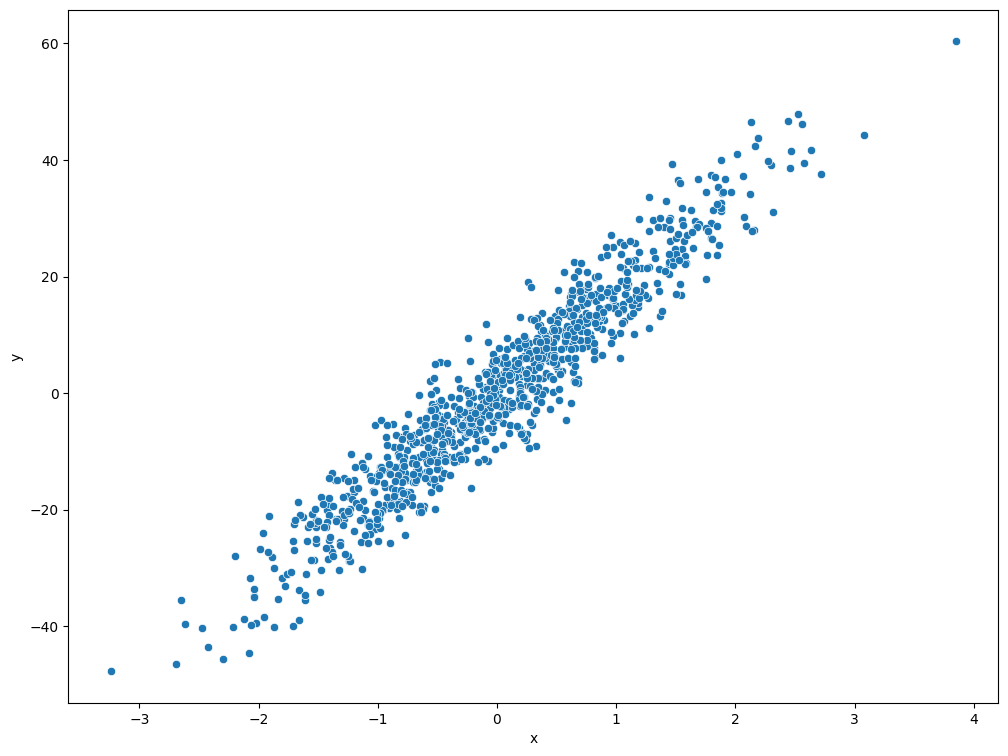

In [3]:
# Data visualization
sns.scatterplot(data=data, x='x', y='y')

In [54]:
# Make Gradient Descent
def mean_squared_error(y, y_hat):
    return np.mean(np.square(y - y_hat))

w_list = []
b_list = []
mse_list = []

def gradient_descent(w=0.1, b=0.1, learning_rate=1e-2, max_iter=100, tol=1e-4, gradient_method='gradient'):

    '''
        - 2차원에서의 단변량 Linear Regression 모델의 gradient descent algorithm을 구현합니다.
        - y = wx + b로 정의되며, learning_rate를 입력받아 epochs 만큼 weight update를 진행합니다.
        - max_iter만큼 진행하다가 주어진 max_iter전에 수렴한 것 같다면 멈춰도 됩니다.
        - 수렴 조건은 업데이트 되는 loss가 tol 이하일 때를 의미합니다.
        - gradient_method : gradient, gradient_numerical
    '''

    # gradient descent algorithm 구현하기
    def gradient(w_, b_):
        grad_w = w_ * x ** 2 + (b - y_) * x # y가 들어가있으면 minus(-)
        grad_b = w*x + b_ - y_
        return np.sum(grad_w), np.sum(grad_b)

    # gradient descent numerical algorithm 구현하기
    def gradient_numerical(w_, b_, eps=0.1):
        grad_w = (mean_squared_error(y_, f_(w_+eps,b)) - mean_squared_error(y_, f_(w_-eps, b))) / 2*eps
        grad_b = (mean_squared_error(y_, f_(w,b_+eps)) - mean_squared_error(y_, f_(w, b_-eps))) / 2*eps
        return grad_w, grad_b

    # linear
    def f_(w, b):
        return w * x + b

    for idx in range(max_iter):
        # gradient 계산
        delta_w, delta_b = locals()[gradient_method](w, b)
        # w와 b값 조정
        w = w - learning_rate * delta_w
        b = b - learning_rate * delta_b

        y_hat = f_(w, b)
        # objective function
        mse = mean_squared_error(y_, y_hat)

        # list에 담기
        w_list.append(w)
        b_list.append(b)
        mse_list.append(mse)

        # 출력하기
        if idx % (10**(len(str(idx))-1)) == 0:
            print(f"{idx}'s mse : {mse}, delta_w : {delta_w}, delta_b : {delta_b}")

        # 훈련 멈추기
        if mse < tol:
            print(f"{idx}th, mse({mse}), w : {w}, b : {b}, delta_w : {delta_w}, delta_b : {delta_b}")
            break

    return w, b

In [42]:
w, b = gradient_descent(max_iter=10000, learning_rate=0.0001,) #tol=24.5046)
print(f'w : {w}, b : {b}')

0's mse : 240.1025336763808, delta_w : -15897.212732810214, delta_b : -243.3672758220495
1's mse : 200.75796483236067, delta_w : -14373.346189916032, delta_b : -188.2979678428375
2's mse : 168.59605959907776, delta_w : -12995.614995045562, delta_b : -141.68153796884695
3's mse : 142.305061023173, delta_w : -11749.998967650143, delta_b : -102.39018871899533
4's mse : 120.81287176860458, delta_w : -10623.82363150988, delta_b : -69.4360062516077
5's mse : 103.2432498286156, delta_w : -9605.630988327912, delta_b : -41.95437047735817
6's mse : 88.88001410656452, delta_w : -8685.062706887766, delta_b : -19.18927398212074
7's mse : 77.13779456064496, delta_w : -7852.754534326717, delta_b : -0.4803348769134175
8's mse : 67.53812979060046, delta_w : -7100.240850858931, delta_b : 14.7486875124399
9's mse : 59.68993402073081, delta_w : -6419.868393017901, delta_b : 27.000044009272216
10's mse : 53.273534399179404, delta_w : -5804.71826424163, delta_b : 36.71096502292593
20's mse : 28.349919367260

In [23]:
# np.insert test code
arr = np.array([[1,2,3], [4,5,6]])
np.insert(arr, arr.shape[1], 1, axis=1)

array([[1, 2, 3, 1],
       [4, 5, 6, 1]])

<Axes: xlabel='x', ylabel='y'>

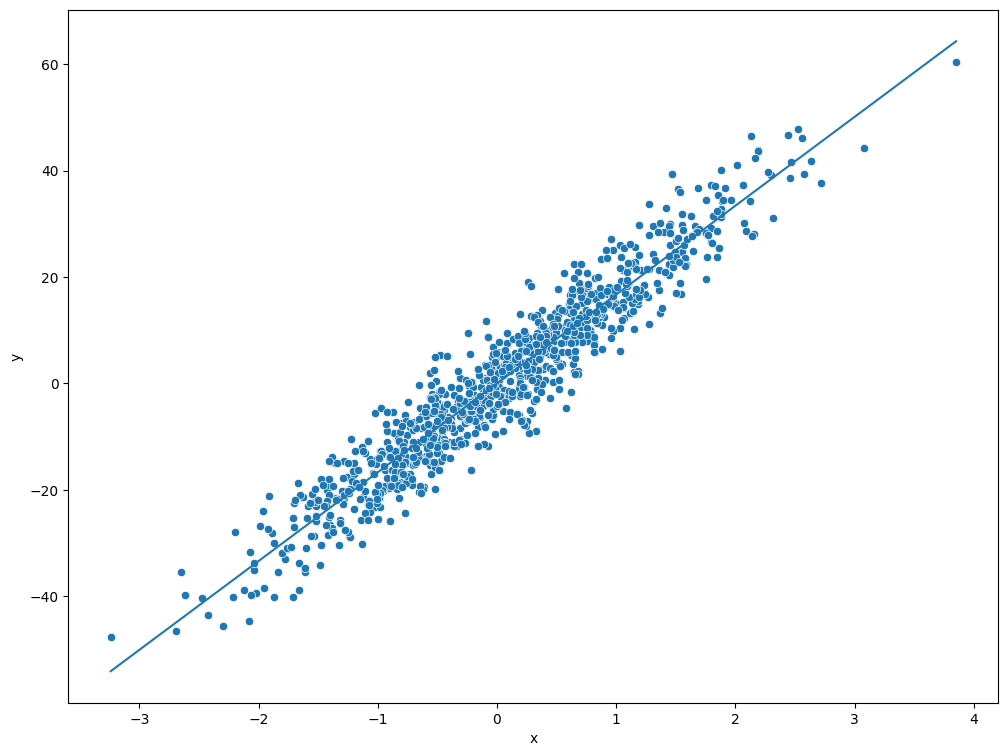

In [39]:
# Visualize Result
sns.scatterplot(data=data, x='x', y='y')
sns.lineplot(x=data['x'], y=w*data['x'] + b)

Text(0, 0.5, 'mse')

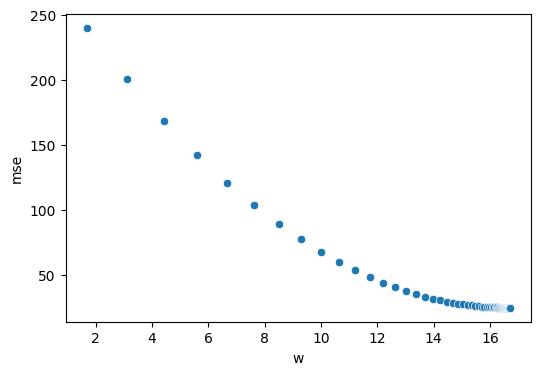

In [43]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=w_list, y=mse_list)
plt.xlabel('w')
plt.ylabel('mse')

In [9]:
np.argmin(np.array(mse_list)), np.min(np.array(mse_list))

(197, 24.504518812819995)

Text(0, 0.5, 'mse')

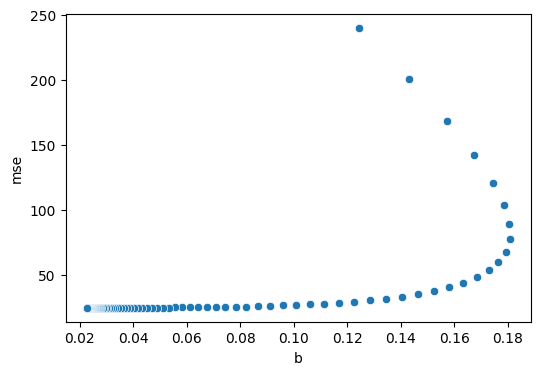

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=b_list, y=mse_list)
plt.xlabel('b')
plt.ylabel('mse')

In [56]:
w, b = gradient_descent(max_iter=10000, learning_rate=0.1, gradient_method='gradient_numerical') #tol=24.5046)
print(f'w : {w}, b : {b}')

0's mse : 287.2246376134816, delta_w : -0.3179442546562058, delta_b : -0.004867345516441902
1's mse : 286.2183555017287, delta_w : -0.3173347080390443, delta_b : -0.004845317793248683
2's mse : 285.2159292956415, delta_w : -0.31672633050467597, delta_b : -0.004823357693081221
3's mse : 284.21734421364164, delta_w : -0.31611911980985213, delta_b : -0.004801465035490083
4's mse : 283.2225855308417, delta_w : -0.31551307371566684, delta_b : -0.00477963964047774
5's mse : 282.23163857882685, delta_w : -0.31490818998749437, delta_b : -0.004757881328492886
6's mse : 281.244488745439, delta_w : -0.31430446639498943, delta_b : -0.004736189920421907
7's mse : 280.26112147456035, delta_w : -0.3137019007121012, delta_b : -0.004714565237600255
8's mse : 279.2815222658984, delta_w : -0.31310049071705637, delta_b : -0.004693007101812441
9's mse : 278.3056766747722, delta_w : -0.3125002341923363, delta_b : -0.004671515335280674
10's mse : 277.3335703118986, delta_w : -0.31190112892467997, delta_b : -

Text(0, 0.5, 'mse')

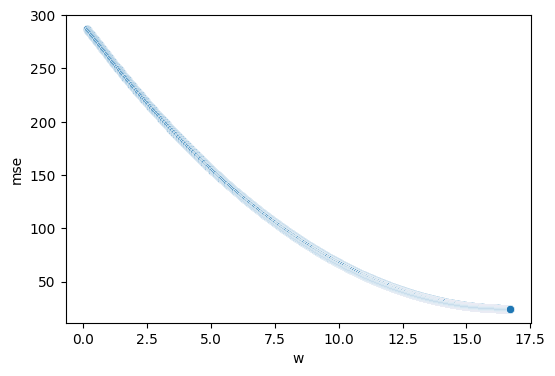

In [57]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=w_list, y=mse_list)
plt.xlabel('w')
plt.ylabel('mse')